In [8]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering, KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
import seaborn as sns

In [18]:
cancer = load_breast_cancer()

In [19]:
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

In [ ]:
print(cancer.DESCR)
# we use this do do simple exploritory data analysis

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

:Number of Instances: 569

:Number of Attributes: 30 numeric, predictive attributes and the class

:Attribute Information:
    - radius (mean of distances from center to points on the perimeter)
    - texture (standard deviation of gray-scale values)
    - perimeter
    - area
    - smoothness (local variation in radius lengths)
    - compactness (perimeter^2 / area - 1.0)
    - concavity (severity of concave portions of the contour)
    - concave points (number of concave portions of the contour)
    - symmetry
    - fractal dimension ("coastline approximation" - 1)

    The mean, standard error, and "worst" or largest (mean of the three
    worst/largest values) of these features were computed for each image,
    resulting in 30 features.  For instance, field 0 is Mean Radius, field
    10 is Radius SE, field 20 is Worst Radius.

    - 

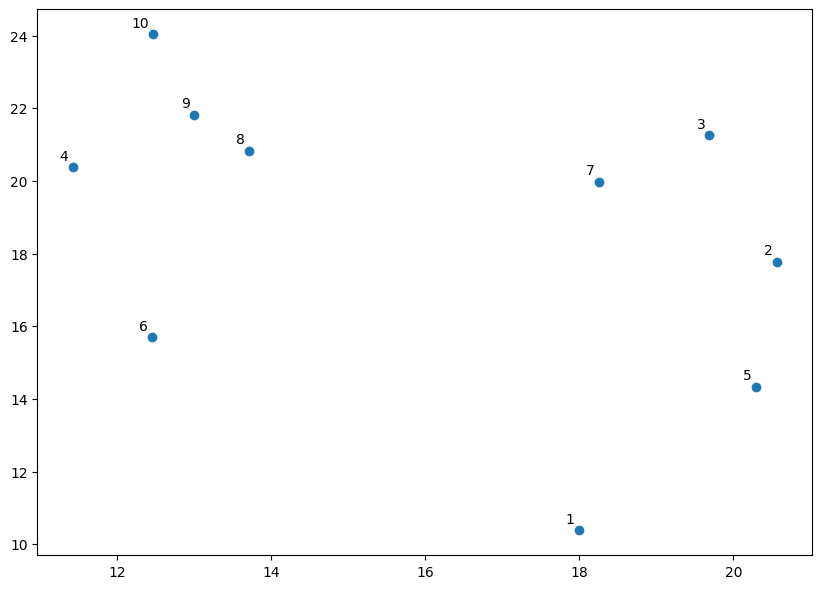

In [26]:



cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

labels = range(1, 11)
plt.figure(figsize=(10, 7))
plt.subplots_adjust(bottom=0.1)

# Use .iloc for integer-location based indexing
plt.scatter(df.iloc[:10, 0], df.iloc[:10, 1], label='True Position')

for label, x, y in zip(labels, df.iloc[:10, 0], df.iloc[:10, 1]):
    plt.annotate(
        label,
        xy=(x, y), xytext=(-3, 3),
        textcoords='offset points', ha='right', va='bottom'
    )

plt.show()


at the top we are creating a scattorplot of the first 10 datapoints

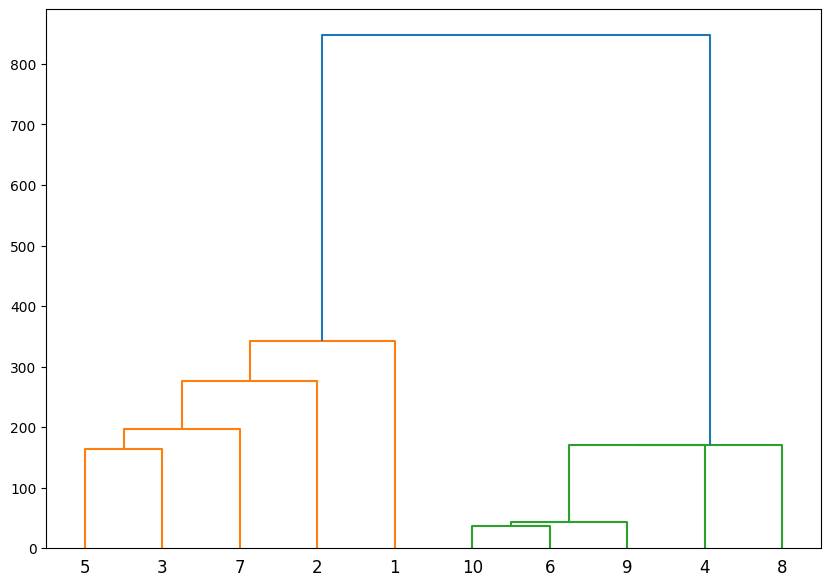

In [28]:
cancer = load_breast_cancer()
df = pd.DataFrame(cancer.data, columns=cancer.feature_names)

linked = linkage(df.iloc[:10, :], 'single')

labelList = range(1, linked.shape[0] + 2)

plt.figure(figsize=(10, 7))
dendrogram(
    linked,
    orientation='top',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.show()

we can see that in this single linkage that, 5 and 3 are closest to each other while 10 and 6 are are also close to each other . Therefore the clusters will be formed from these 2 points 

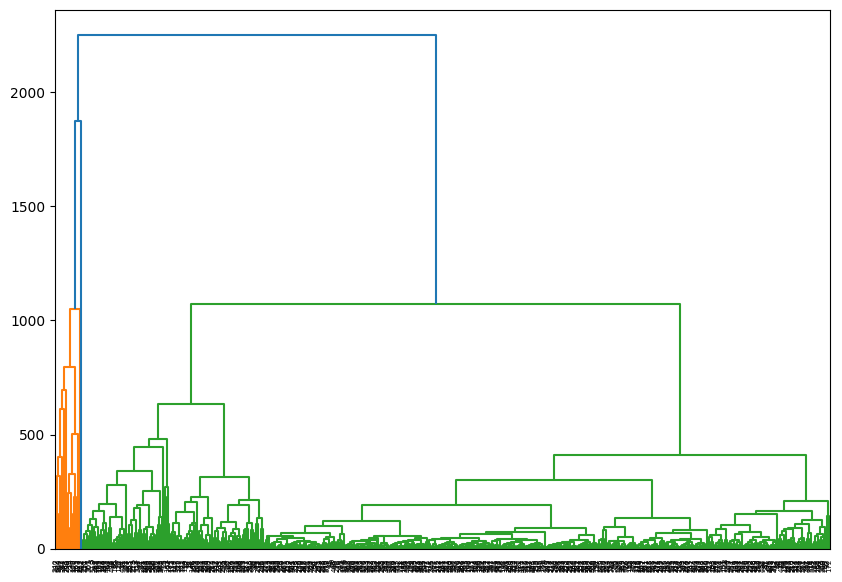

In [34]:

linked_average = linkage(df, method='average')


labelList = range(1, linked_average.shape[0] + 2)

plt.figure(figsize=(10, 7))
dendrogram(
    linked_average,
    orientation='top',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.show()

this avaerage likage looks very close to its own clusters, calculates the average distance between all pairs clusters. then merges clusters with the smallest average distance 

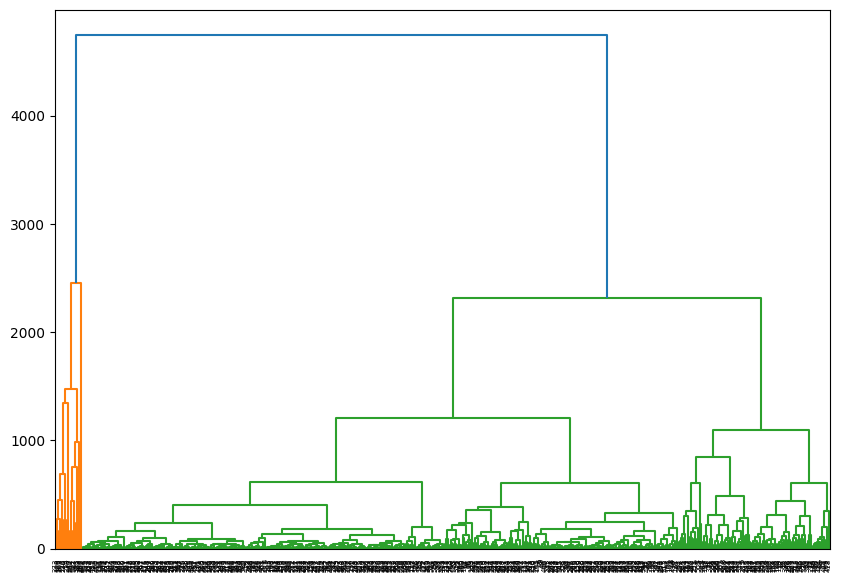

In [32]:

linked_complete = linkage(df, method='complete')


labelList = range(1, linked_complete.shape[0] + 2)

plt.figure(figsize=(10, 7))
dendrogram(
    linked_complete,
    orientation='top',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.show()

This dendrogram helps visualize the hierarchical relationships between data points, making it clear how clusters evolve and are structured

- the y axis represents distance
- the x represents data points or the clusters 

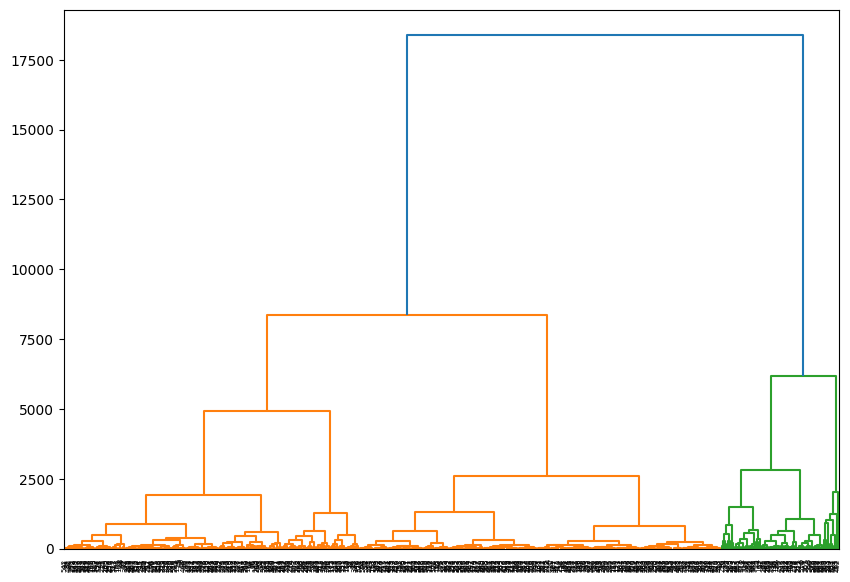

In [35]:

linked_ward = linkage(df, method='ward')


labelList = range(1, linked_ward.shape[0] + 2)

plt.figure(figsize=(10, 7))
dendrogram(
    linked_ward,
    orientation='top',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=True
)
plt.show()

this ward linkage will calculate the sum of squared between each cluster, then will start merging the clusters, and minimize the size. tends to produce a lot more balance clusters then the other linkage I have so far. Allows us to vizualize it a bit better

In [37]:
from sklearn.cluster import k_means 

c:\Users\nadge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nadge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nadge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(
c:\Users\nadge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Window

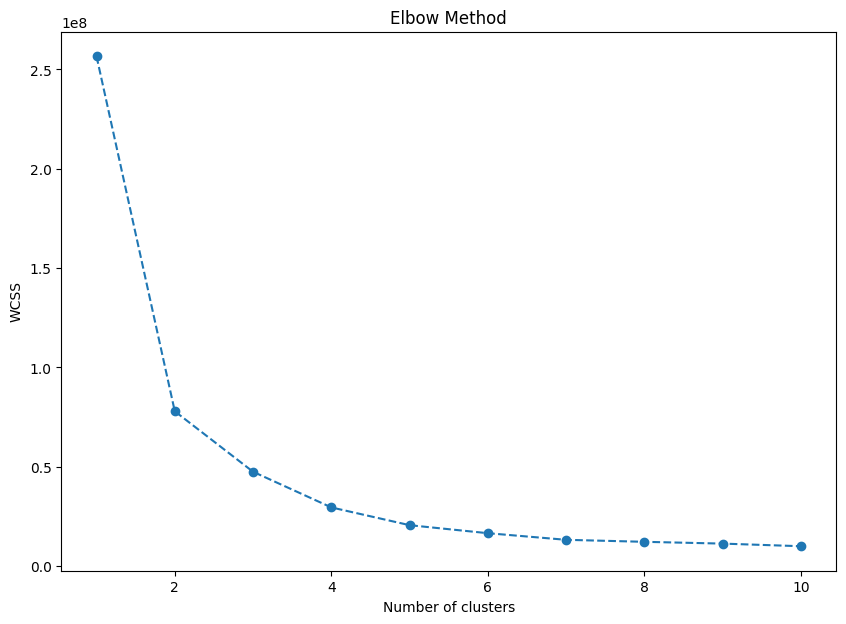

In [39]:

wcss = []  

# Calculate WCSS for different number of clusters
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,  random_state=42)
    kmeans.fit(df)
    wcss.append(kmeans.inertia_)

# Plot the elbow graph
plt.figure(figsize=(10, 7))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

we used a elbow method to determine the optimal number of clusters. in this case the optimal clusters is 2.

In [43]:
from sklearn.model_selection import train_test_split
X = df
y = cancer.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [46]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
# this is permoning PCA on the data
#scales the pca to the scaled training data models 
#then transforms it by reducing its dimensionality
pca = PCA()
train_pca = pca.fit_transform(X_train_scaled)
test_pca = pca.transform(X_test_scaled)

In [48]:
pca = PCA(n_components=6)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

c:\Users\nadge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


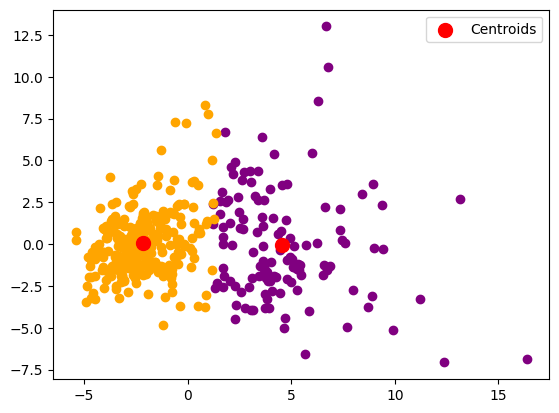

In [49]:
kmeans = KMeans(n_clusters = 2, random_state=42)
kmeans.fit(X_train_pca)
y_pred = kmeans.predict(X_train_pca)

plt.scatter(X_train_pca[y_pred == 0, 0], X_train_pca[y_pred == 0, 1], c='purple')
plt.scatter(X_train_pca[y_pred == 1, 0], X_train_pca[y_pred == 1, 1], c='orange')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

plt.legend()
plt.show()

we have plotted the datapoints and centroids of the k-menas clustering algorythim. The orange cluster seems very nice since its a lot more compact than the purple cluster


- purple points is cluster 0 



- orange is cluster 1

In [50]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

In [51]:
print ('Accuracy:', accuracy_score(y_train, y_pred))
print ('\n Confussion Matrix:\n',confusion_matrix(y_train, y_pred))
print ('\n Clasification Report:\n', classification_report(y_train, y_pred))

Accuracy: 0.9221105527638191

 Confussion Matrix:
 [[123  26]
 [  5 244]]

 Clasification Report:
               precision    recall  f1-score   support

           0       0.96      0.83      0.89       149
           1       0.90      0.98      0.94       249

    accuracy                           0.92       398
   macro avg       0.93      0.90      0.91       398
weighted avg       0.93      0.92      0.92       398



Below we did parameter optimization for the matrix, 

In [52]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_clusters': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'init': ['k-means++', 'random'],
    'n_init': [10, 20, 30],
    'max_iter': [300, 400, 500],
    'random_state': [42]
}

# Initialize the KMeans model
kmeans = KMeans()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=kmeans, param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')

# Fit GridSearchCV
grid_search.fit(X_train_pca, y_train)


best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the KMeans model with the best parameters
kmeans_optimized = KMeans(**best_params)
kmeans_optimized.fit(X_train_pca)
y_pred_optimized = kmeans_optimized.predict(X_train_pca)

# Re-run the evaluation metrics
print('Accuracy:', accuracy_score(y_train, y_pred_optimized))
print('\nConfusion Matrix:\n', confusion_matrix(y_train, y_pred_optimized))
print('\nClassification Report:\n', classification_report(y_train, y_pred_optimized))

Best parameters found:  {'init': 'k-means++', 'max_iter': 300, 'n_clusters': 2, 'n_init': 20, 'random_state': 42}
Accuracy: 0.08542713567839195

Confusion Matrix:
 [[ 25 124]
 [240   9]]

Classification Report:
               precision    recall  f1-score   support

           0       0.09      0.17      0.12       149
           1       0.07      0.04      0.05       249

    accuracy                           0.09       398
   macro avg       0.08      0.10      0.08       398
weighted avg       0.08      0.09      0.07       398



c:\Users\nadge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(
c:\Users\nadge\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


Looking at the matrix we can tell that the performance has definetly gone down after being optimized

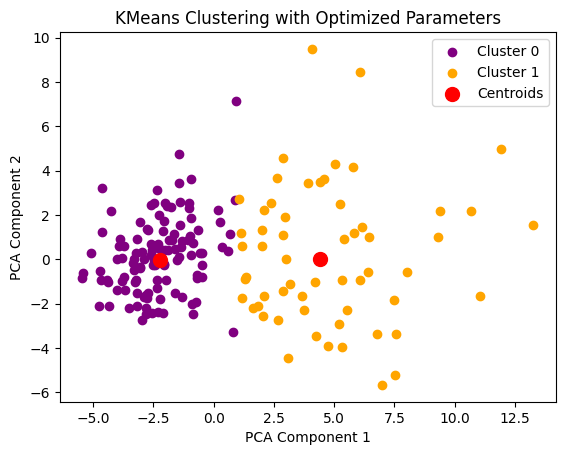

In [53]:
# Predict the clusters for the test data using the optimized KMeans model
y_test_pred_optimized = kmeans_optimized.predict(X_test_pca)

# Plot the clusters
plt.scatter(X_test_pca[y_test_pred_optimized == 0, 0], X_test_pca[y_test_pred_optimized == 0, 1], c='purple', label='Cluster 0')
plt.scatter(X_test_pca[y_test_pred_optimized == 1, 0], X_test_pca[y_test_pred_optimized == 1, 1], c='orange', label='Cluster 1')
plt.scatter(kmeans_optimized.cluster_centers_[:, 0], kmeans_optimized.cluster_centers_[:, 1], s=100, c='red', label='Centroids')

plt.legend()
plt.title('KMeans Clustering with Optimized Parameters')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()

From the optimization, it seems that the optimized version os performing a lot more poorly then the non optimized kmeans clustering since. The orrange clusters are a lot more spread apart in this one opposed to the purple ones that are a bit more clustered together 